In [36]:
import geopandas as gpd
import pandas as pd

In [37]:
# Load datasets

gdf_areas = gpd.read_file(f'C:/Users/Lenovo/Downloads/greenery/RUZINOV_plochy_zelene.shp')
gdf_areas = gdf_areas.to_crs("EPSG:4326")

gdf_trees = gpd.read_file(f'C:/Users/Lenovo/Downloads/greenery/RUZINOV_stromy.shp')
gdf_trees = gdf_trees.to_crs("EPSG:4326")



In [38]:
# Calculate better area than VYMERA1

new_crs = gdf_areas.to_crs(epsg=6933)
gdf_areas['area'] = new_crs.area

gdf_areas_size = gdf_areas[['ID', 'area', 'geometry']]

In [39]:
# Join trees on all areas
joined_areas_trees = gpd.sjoin(gdf_areas,gdf_trees, how='right')


In [40]:
# Calculate number of trees per area
number_of_trees_per_area = joined_areas_trees.groupby("ID_left").size().sort_values(ascending=False)
number_of_trees_per_area = number_of_trees_per_area.rename_axis('ID')
number_of_trees_per_area = number_of_trees_per_area.to_frame().reset_index() 

In [41]:
# Calculate density of trees in the area (number of trees per square meter)
tree_density = gdf_areas_size.merge(number_of_trees_per_area, on='ID').rename(columns = {0: 'n_trees'})
tree_density['density'] = tree_density['n_trees']/tree_density['area']


<Axes: >

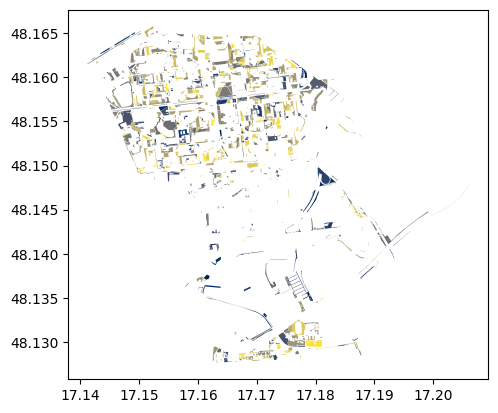

In [42]:
# Display 1000 least dense areas which are at least 100 m2
large_areas_tree_density = tree_density[tree_density['area']>100].sort_values(by = 'density')
large_areas_tree_density[0:1000].plot('density', cmap = 'cividis')